In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Canny

In [9]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

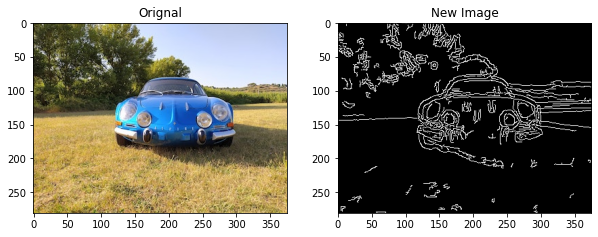

In [10]:
# Loads the image from the specified file
image = cv2.imread("data/alpine.jpg")
# Filters the images using GaussianBlur on the image with noise using a 11 by 11 kernel 
image_filtered = cv2.GaussianBlur(image,(7,7),sigmaX=10,sigmaY=10)

ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=image_filtered, ddepth=ddepth, dx=1, dy=0, ksize=3)
# Applys the filter on the image in the X direction
grad_y = cv2.Sobel(src=image_filtered, ddepth=ddepth, dx=0, dy=1, ksize=3)

# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# Canny Edge Detection

edges = cv2.Canny(image=grad, threshold1=100, threshold2=200)
# Display Canny Edge Detection Image
plot_image(image, edges)